In [1]:
# Load libraries
import seaborn
import pandas
from sklearn import tree
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score


In [2]:
dataset = pandas.read_csv("unplugged.csv")
dataset.sample(frac=1)
dataset = dataset[0:300]
del dataset['Comments']


In [3]:
print(dataset.head(5))

  School Name Student Name  Age Gender Results_Before Results_After  Class  \
0   IMSJ G9-2       Anthny   12      M              F             F      4   
1   IMSJ G9-2  Farhana Ali   10      F              F             F      4   
2   IMSJ G9-2    Samiullah   10      M              F             F      4   
3   IMSJ G9-2        Uzair   12      M              F             F      4   
4   IMSJ G9-2        Sarim    8      M              P             P      4   

  Change  
0      F  
1      F  
2      F  
3      F  
4      T  


In [4]:
print(dataset.shape)

(300, 8)


In [5]:
# dataset = dataset.drop('Id',axis=1)

In [6]:



gender = {'M': 1, 'F': 2}
dataset.Gender = [gender[item] for item in dataset.Gender]

after = {'F': 0, 'P': 1}
dataset.Results_After   = [after[item] for item in dataset.Results_After]

before = {'F': 0, 'P': 1}
dataset.Results_Before   = [before[item] for item in dataset.Results_Before]

print(dataset.describe())

dataset =  dataset[['Age', 'Gender', 'Class', 'Results_Before', 'Results_After', 'Change']]

              Age      Gender  Results_Before  Results_After       Class
count  300.000000  300.000000      300.000000     300.000000  300.000000
mean     9.653333    1.653333        0.400000       0.776667    4.263333
std      1.293083    0.476704        0.490716       0.417176    0.441178
min      7.000000    1.000000        0.000000       0.000000    4.000000
25%      9.000000    1.000000        0.000000       1.000000    4.000000
50%     10.000000    2.000000        0.000000       1.000000    4.000000
75%     10.000000    2.000000        1.000000       1.000000    5.000000
max     14.000000    2.000000        1.000000       1.000000    5.000000


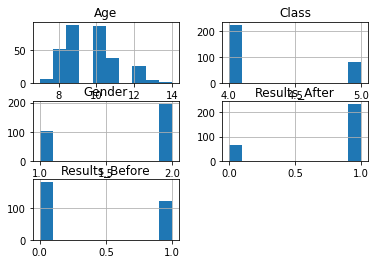

In [7]:
dataset.hist()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
array = dataset.values
X = array[:,0:5]
Y = array[:,5:]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, 
random_state=seed, stratify = dataset['Class'])

In [9]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'
models = []

models.append(('DT', DecisionTreeClassifier()))

# evaluate each model in turn
results = []
names = []

In [10]:
import sklearn
for name, model in models:
	kfold = sklearn.model_selection.KFold(n_splits=10,shuffle=False, random_state=None)
	cv_results = sklearn.model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

DT: 0.987500 (0.026680)


In [11]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
predictions = clf.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

1.0


In [12]:
print(confusion_matrix(Y_validation, predictions))

[[14  0]
 [ 0 46]]


In [13]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           F       1.00      1.00      1.00        14
           T       1.00      1.00      1.00        46

   micro avg       1.00      1.00      1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [14]:
# #Precision
# precision = precision_score((Y_validation), predictions, average='micro')
# print("Precision", str(precision))

# #recall
# recall = recall_score((Y_validation), predictions, average='micro')
# print("Recall : ", str(recall))

# #f-score
# f_score = f1_score((Y_validation), predictions, average='micro')
# print("F Score : " + str(f_score))


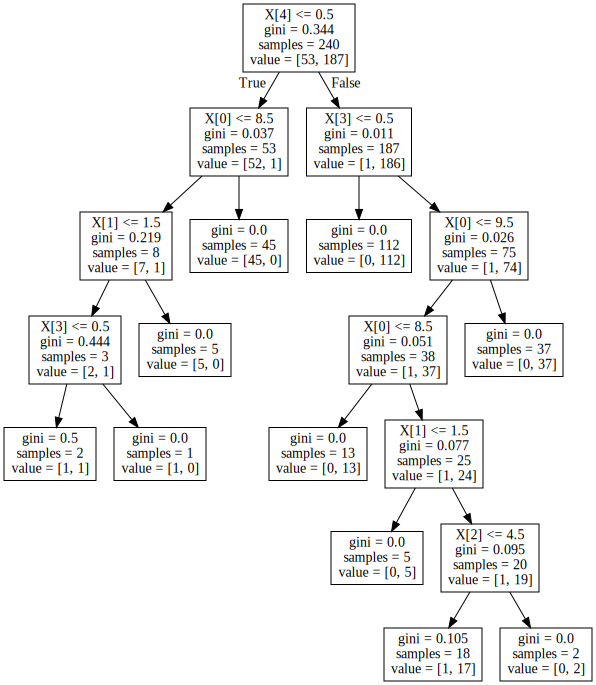

In [15]:

dot_data = tree.export_graphviz(clf, out_file=None,
#                      feature_names=vectorizer.get_feature_names(),
                     class_names=["0", "1"],
                     filled=True, rounded=True,
                     special_characters=True)

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("lol_1111")
graph